# **Bank Loan Approval Prediction**

## Life cycle of Machine learning Project

- Understanding the Problem Statement     
- Data Collection     
- Data Checks to perform     
- Exploratory data analysis     
- Data Pre-Processing     
- Model Training     
- Choose best model     

## (1) Problem Statement

   Banks receive many loan applications every day.    
   But not **every person qualifies for a loan**.

   So the goal is:

- To build a Machine Learning model that predicts whether a customer will get loan approval or not, based on their personal and financial details.

## (2) Data Collection 

- Dataset Source - https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset
- The data consists of 13 columns and 4269 rows.

## 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [60]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame


In [61]:
df = pd.read_csv("D:\Loan_Approval_Prediction\LoanApproval_Data\loan_approval_prediction.csv")

Show Top 5 Records


In [62]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Shape of the dataset


In [63]:
df.shape

(4269, 13)

## 2.2 Dataset Information

| Column name                                            | Meaning / Description                                                        |
| ------------------------------------------------------ | ---------------------------------------------------------------------------- |
| `loan_id`                                              | Unique ID for each loan application                                          |
| `no_of_dependents`                                     | Number of dependents (people dependent on applicant)                         |
| `education`                                            | Education level of applicant (e.g. graduate / not graduate)                  |
| `self_employed`                                        | Whether applicant is self-employed or not                                    |
| `income_annum`                                         | Annual income of the applicant                                               |
| `loan_amount`                                          | Amount of loan requested/required by applicant                               |
| `loan_term`                                            | Requested loan term / tenure (time to repay)                                 |
| `cibil_score`                                          | Credit score of the applicant — measure of creditworthiness                  |
| `residential_assets_value`                             | Value of residential assets owned by applicant                               |
| `commercial_assets_value`                              | Value of any commercial assets owned (if any) by applicant                   |
| `luxury_assets_value`                                  | Value of luxury assets owned by applicant (if any)                           |
| `bank_asset_value`                                     | Value/assets in bank (bank balance / holdings) of applicant                  |
| `loan_status`                                          | Target variable: whether loan was approved or rejected (Approved / Rejected) |

## 3. Data Checks to perform 

### 3.1 Check dataset columns

In [64]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

- In our column names, there are some extra spaces at the beginning.
### We are going to remove those spaces so that while fetching the columns from the dataset, we do not face any kind of difficulty.

### 3.2 Removing extra spaces from the column names.

In [65]:
for i in list(df.columns)[1:]:
    df.rename(columns={i:i[1:]},inplace=True)
df.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

- **Problem Solved**

### 3.3 Check dataset information

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


- There are 10 integer columns and 3 object columns. We can easily see that there are no null values in the dataset.

### 3.4 Check missing value, null value

In [67]:
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

### 3.5 Check Duplicates

In [68]:
df[df.duplicated()]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status


- There are no duplicate records present in the dataset.

### 3.6 Check the number of unique values of each column

#### - 3.6.1 for categorical columns

In [69]:
df.select_dtypes(include='object').nunique()

education        2
self_employed    2
loan_status      2
dtype: int64

- There are three categorical columns and each has 2 unique values.

#### - 3.6.2 for Integer columns

In [70]:
df.select_dtypes(include='int').nunique()

loan_id                     4269
no_of_dependents               6
income_annum                  98
loan_amount                  378
loan_term                     10
cibil_score                  601
residential_assets_value     278
commercial_assets_value      188
luxury_assets_value          379
bank_asset_value             146
dtype: int64

- There are 6 types of dependents and 10 types of loan term values in the dataset.
- **The loan_id column is completely unique, so we should remove it from the dataset.**

### 3.7 Remove loan_id column

In [71]:
df.drop('loan_id',axis=1,inplace=True)

### 3.8 Check statistics of data set

In [72]:
df.describe(include='int')

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


- A maximum of 5 family members are dependent on the customer, and the bank provides a loan for up to 20 months based on the dataset.

### 3.9 Check the unique value of the categorical columns

In [73]:
for i in list(df.select_dtypes(include='object')):
    print(f"• Unique value of {i} column are : {df[i].unique()}")

• Unique value of education column are : [' Graduate' ' Not Graduate']
• Unique value of self_employed column are : [' No' ' Yes']
• Unique value of loan_status column are : [' Approved' ' Rejected']


- In our column values, there are some extra spaces at the beginning.

### We are going to remove these spaces so that while analyzing or processing the data, we do not face any issues.

### 3.10 Removing extra spaces from the values of the columns

In [74]:
for i in list(df.select_dtypes(include='object')):
    for j in list(df[i].unique()):
        df[i] = df[i].replace(j,j[1:])

for i in list(df.select_dtypes(include='object')):
    print(f"• Unique value of {i} column are : {df[i].unique()}")

• Unique value of education column are : ['Graduate' 'Not Graduate']
• Unique value of self_employed column are : ['No' 'Yes']
• Unique value of loan_status column are : ['Approved' 'Rejected']


- **Problem Solved**

### 3.11 Check the head, tail and sample

In [75]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [76]:
df.tail()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


In [77]:
df.sample(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1967,3,Not Graduate,Yes,6000000,18700000,18,783,2800000,8500000,20300000,8800000,Approved
3575,4,Not Graduate,No,7400000,15400000,6,677,22000000,13500000,28900000,7400000,Approved
3982,1,Not Graduate,Yes,2300000,5500000,6,861,1600000,1200000,4700000,1700000,Approved
2133,0,Graduate,No,7100000,20700000,10,784,9500000,11400000,27900000,8600000,Approved
2613,0,Not Graduate,Yes,9600000,19600000,12,500,21500000,700000,37600000,10900000,Rejected


## 4. Univariate Analysis

### 4.1 Create a list of **Numeric Columns** and **Categorical Columns**

In [78]:
numeric_col = list(df.select_dtypes(include='int').columns)
categorical_col = list(df.select_dtypes(include='object'))
print(f"Numeric Columns : {numeric_col}")
print(f"Categorical Columns :{categorical_col}")

Numeric Columns : ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
Categorical Columns :['education', 'self_employed', 'loan_status']


- Dataset have ***3 categorical columns*** and ***10 Numerical Columns***

### 4.2 Create a ***Pie Chart*** and ***Bar Chart*** for the categorical columns.

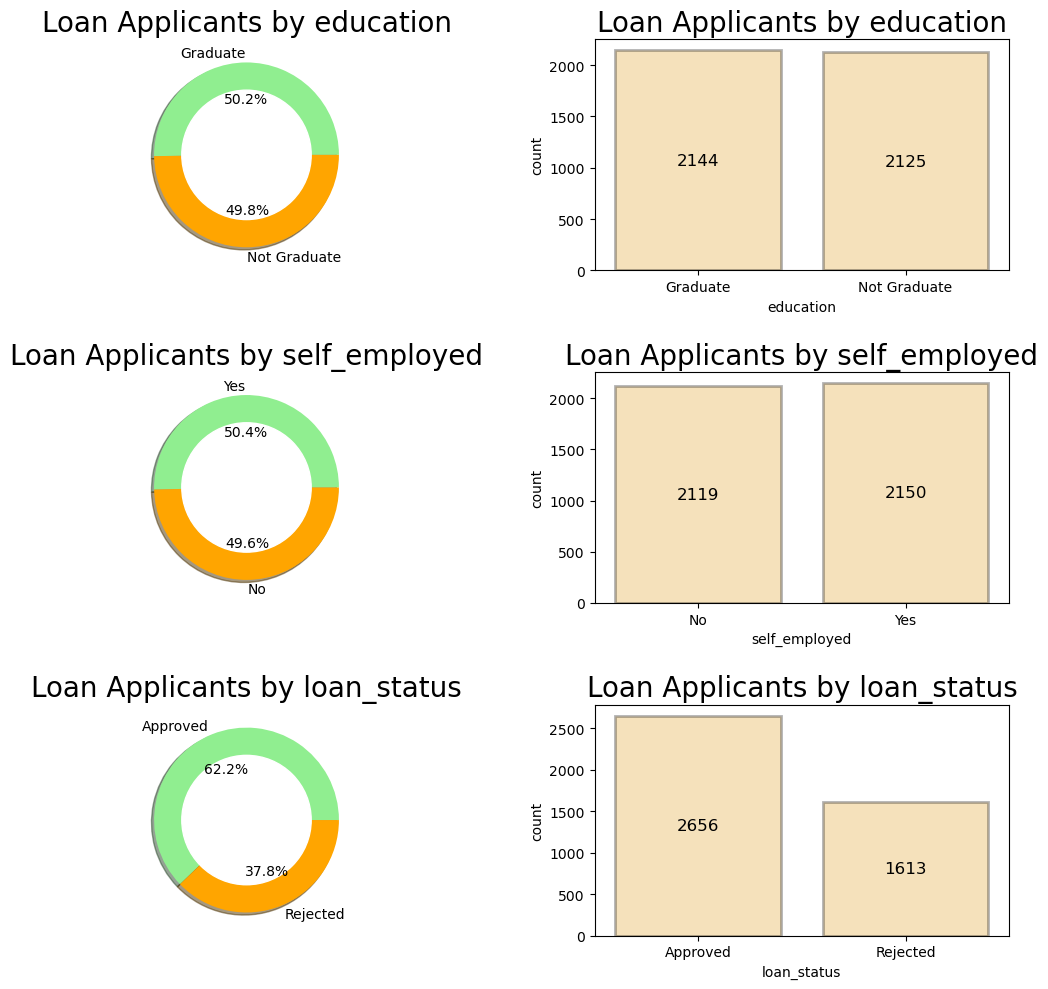

In [79]:
count=1
plt.figure(figsize=(10,10))
for col in categorical_col:
    values_count = df[col].value_counts()
    plt.subplot(len(categorical_col),2,count)
    
    plt.pie(values_count.values,labels=values_count.index, autopct='%1.1f%%',shadow=True,colors=['lightgreen','orange'])
    circle = plt.Circle((0,0), 0.70, color='white')
    plt.gca().add_artist(circle)
    plt.title(f"Loan Applicants by {col}",fontsize=20)
    count+=1
    plt.subplot(len(categorical_col),2,count)
    ax = sns.countplot(x=col,data=df,color='orange',alpha=0.3,edgecolor='black',linewidth=2)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2., height/2, int(height), ha='center', va='center', color='black', fontsize=12)

    plt.title(f"Loan Applicants by {col}",fontsize=20)
    count+=1
plt.tight_layout(w_pad=10, h_pad=2)
plt.show()


#### Education  
- ***50.2%*** of applicants are graduates, and ***49.8%*** of applicants are not graduates.
#### Self Employed 
- ***50.4%*** of applicants are self employed, and ***49.6%*** of applicants are not self employed. 
#### Loan Status  
- ***62.2%*** of applicants are Approved, and ***37.8%*** of applicants are Rejected.

### 4.3 Count plot of no_of_dependents and loan_term

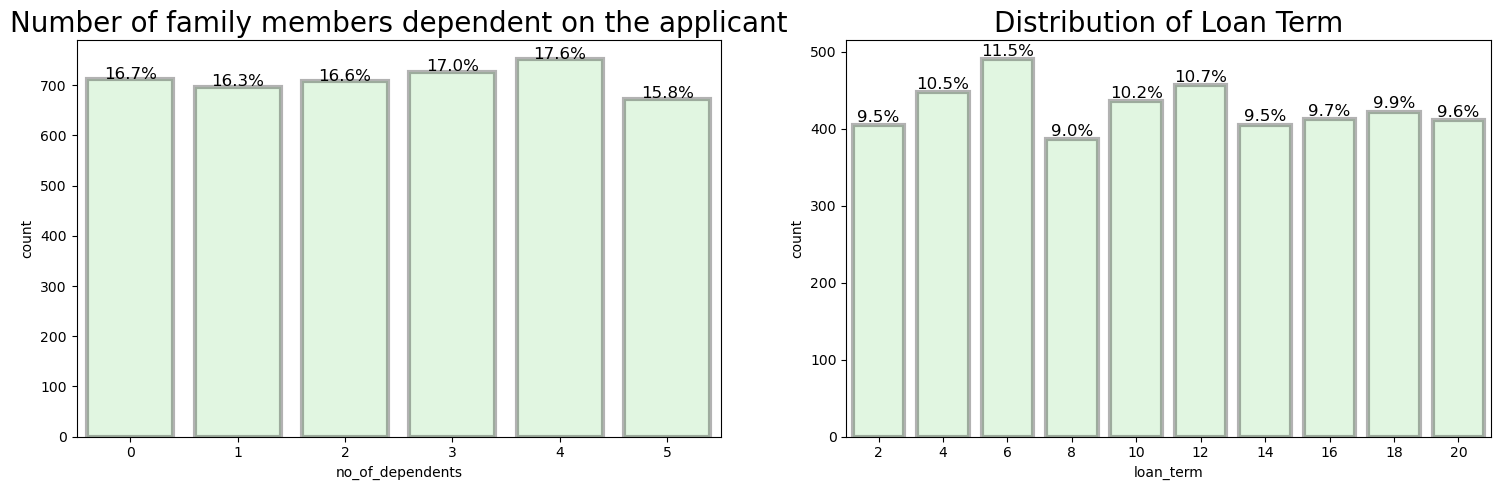

In [80]:
count = 1
plt.figure(figsize=(15,5))
for col in ['no_of_dependents','loan_term']:
    plt.subplot(1,2,count)
    ax=sns.countplot(x=col,data=df,color='lightgreen',alpha=0.3,edgecolor='black',linewidth=3)
    total = len(df)
    for p in ax.patches:
        height = p.get_height()
        percent = (height / total) * 100
        ax.text(p.get_x() + p.get_width()/2.,height+10.0,f'{percent:.1f}%',ha='center', va='center',color='black',fontsize=12)
    if count == 1:
        plt.title("Number of family members dependent on the applicant",fontsize=20)
    else:
        plt.title("Distribution of Loan Term",fontsize=20)
    count+=1
plt.tight_layout(w_pad=5)
plt.show()

#### no_of_dependents
- Most applicants financially support ***3–4 family members***, indicating moderate financial responsibility.
#### loan_term
- Loan terms are fairly balanced, with a slight preference for ***medium-duration loans like 6–12 months***.

### 4.4 Create a Histogram for numeric columns.

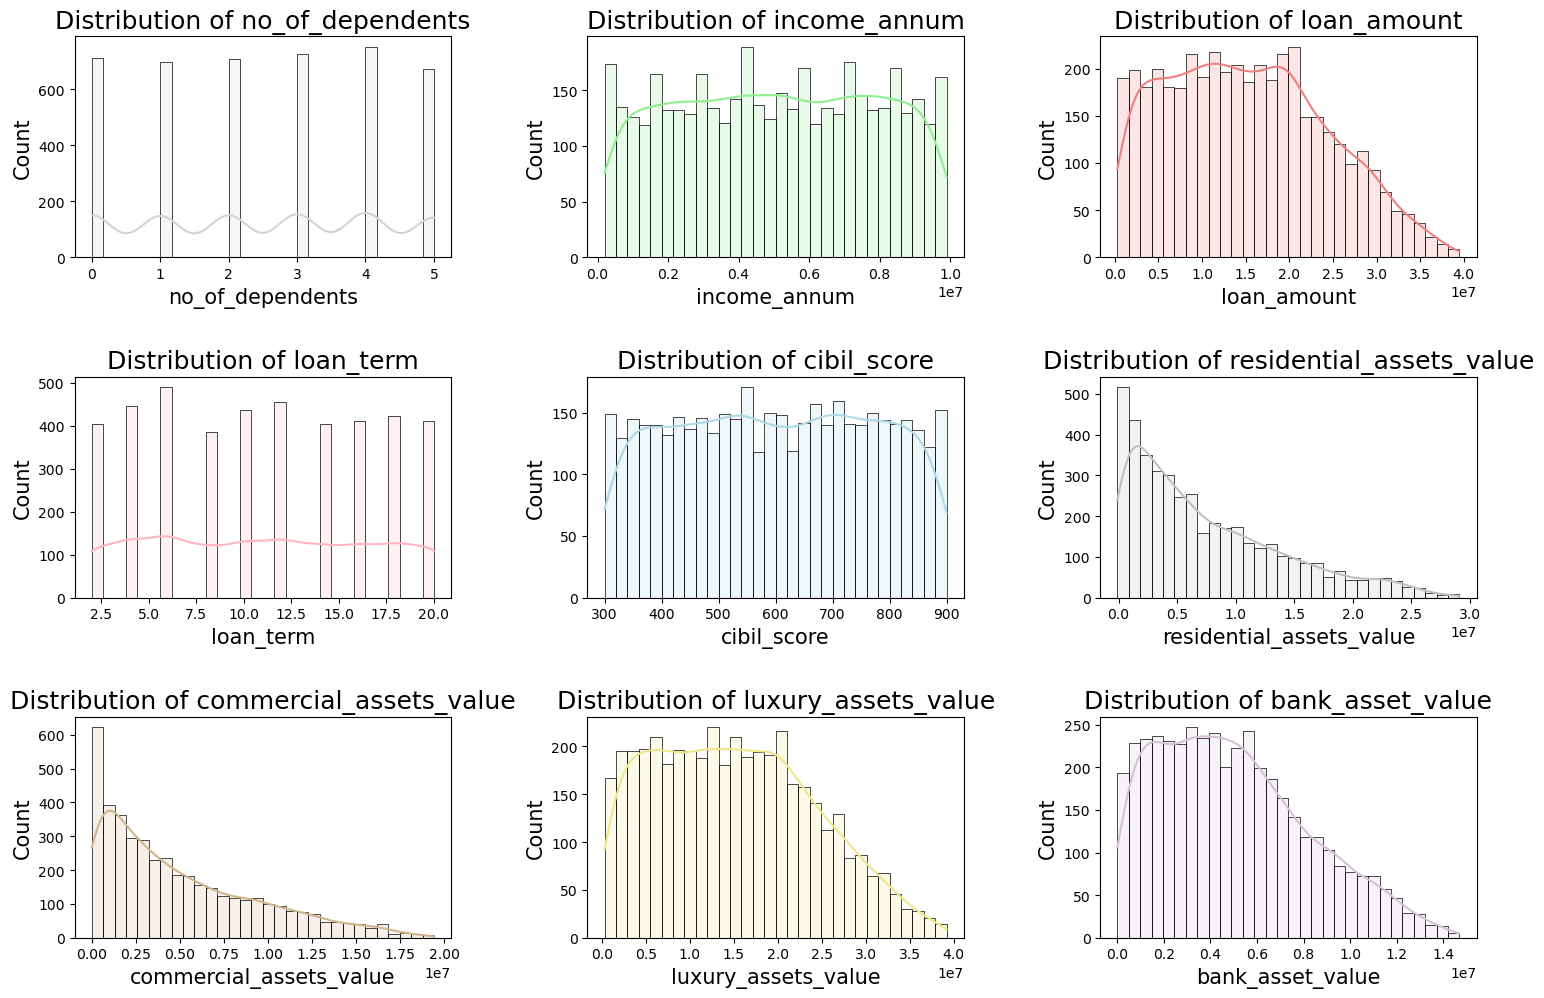

In [81]:
count=0
plt.figure(figsize=(15,30))
for col in numeric_col:
    colors =  ['lightgrey','lightgreen','lightcoral','lightpink','lightblue','silver','tan','khaki','thistle']
    plt.subplot(len(numeric_col),3,count+1)
    sns.histplot(x=col,data=df,bins=30,kde=True,color=colors[count],edgecolor='black',linewidth=0.5,alpha=0.2)
    plt.title(f"Distribution of {col}",fontsize=18)
    plt.xlabel(col,fontsize=15)
    plt.ylabel("Count",fontsize=15)
    count+=1
plt.tight_layout(w_pad=5,h_pad=3)
plt.show()
    

#### no_of_dependents

- Most applicants have between 1–3 dependents, resembling a Right-Skewed Discrete Distribution (Poisson-like).

#### income_annum

- Income is widely spread but denser in mid-range values, showing a Slight Right-Skewed Continuous Distribution (Log-Normal-like).

#### loan_amount

- Loan amounts are concentrated on lower values and decrease gradually toward higher amounts, indicating a Right-Skewed Distribution (Exponential-like).

#### loan_term

- Loan term values remain evenly distributed with mild skewness, nearly forming a Uniform-like Distribution.

#### cibil_score

- CIBIL score is concentrated in mid-high values, resembling a Near-Normal Distribution but slightly right-leaning.

#### residential_assets_value

- Majority of applicants possess lower-value assets, forming a Strong Right-Skewed Distribution (Exponential-like).

#### commercial_assets_value

- Commercial assets heavily concentrate toward lower amounts, also showing a Strong Right-Skewed (Exponential-like) pattern.

#### luxury_assets_value

- Luxury assets peak around the middle ranges and taper off, forming a Moderately Right-Skewed Distribution.

#### bank_asset_value

- Bank asset value decreases as the value increases, clearly forming a Right-Skewed (Exponential-like) distribution.

### 4.5 Create a Box Plot to visualize outliers and find outliers

#### 4.5.1 Visualize Outliers

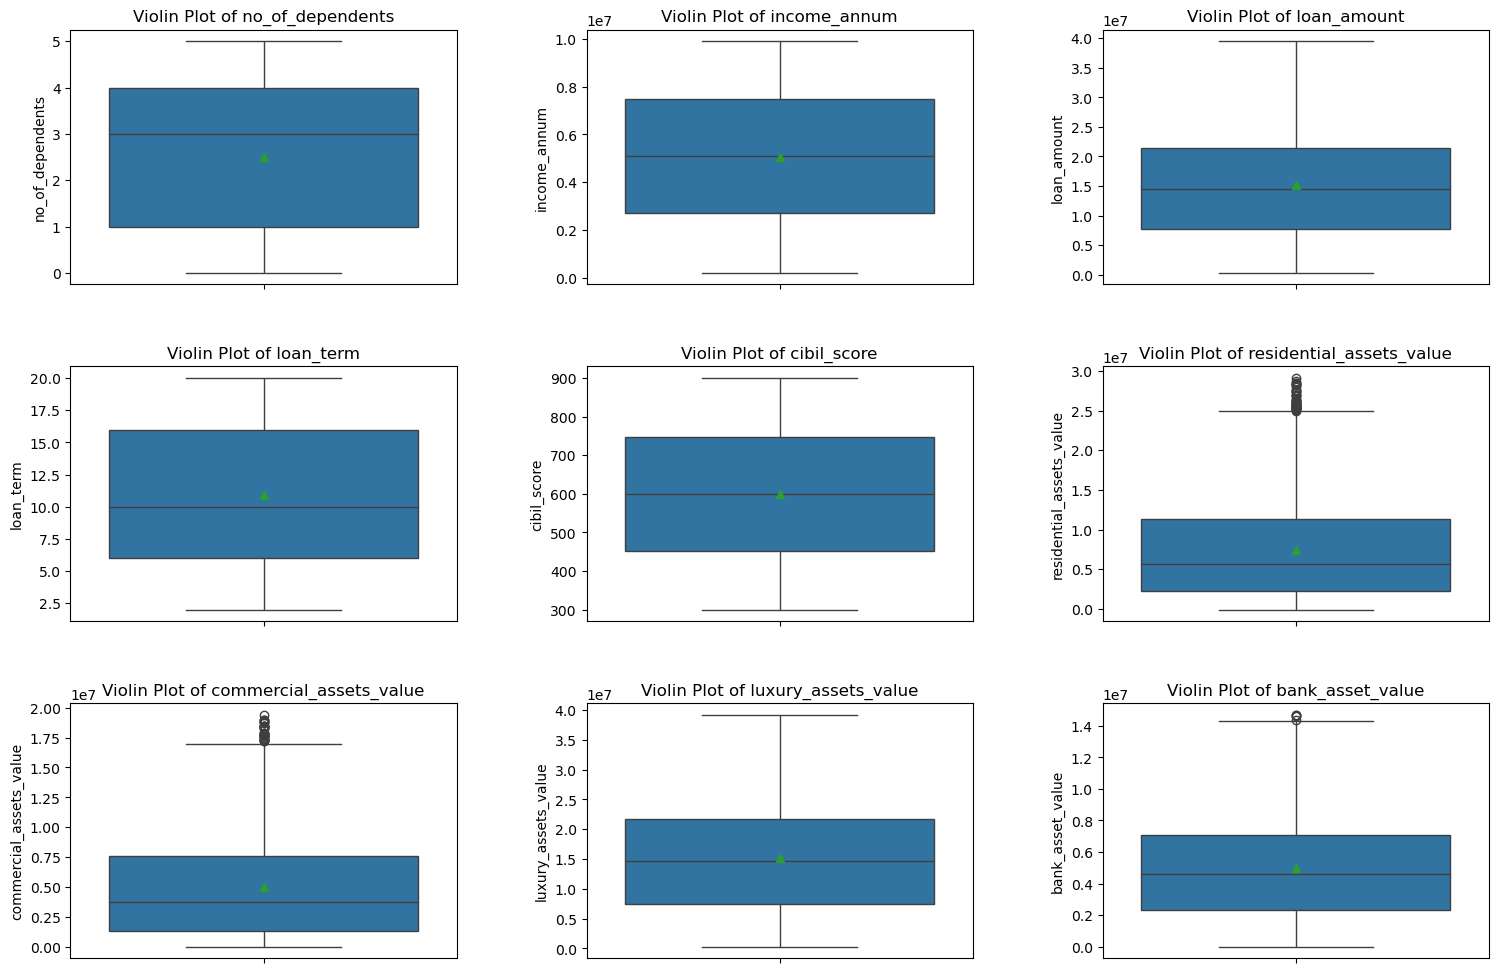

In [82]:
count=0
plt.figure(figsize=(15,30))
for col in numeric_col:
    plt.subplot(len(numeric_col),3,count+1)
    sns.boxplot(y=col,data=df,showmeans=True)
    plt.title(f"Violin Plot of {col}")
    count+=1
plt.tight_layout(w_pad=5,h_pad=3)
plt.show()

#### 4.5.2 Find Outliers

In [83]:
Outliers_dict = {}
for col in numeric_col:
    q1,q3 = df[col].quantile([0.25,0.75])
    IQR = q3 - q1 
    lower_fence = q1 - 1.5 * IQR 
    upper_fence = q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_fence) | (df[col] > upper_fence)][col]
    Outliers_dict[col] = outliers.to_list()
for key,values in Outliers_dict.items():
    print(f"{key} : {values}")
    print(f"Length of {key} : {len(values)}")

no_of_dependents : []
Length of no_of_dependents : 0
income_annum : []
Length of income_annum : 0
loan_amount : []
Length of loan_amount : 0
loan_term : []
Length of loan_term : 0
cibil_score : []
Length of cibil_score : 0
residential_assets_value : [25500000, 25900000, 26800000, 25500000, 25600000, 25400000, 28300000, 26300000, 27600000, 28700000, 25300000, 25800000, 25500000, 25300000, 28200000, 25200000, 25800000, 25700000, 25500000, 27000000, 28500000, 26300000, 28400000, 27000000, 25900000, 28500000, 26600000, 26200000, 28000000, 25800000, 25500000, 26900000, 25200000, 27600000, 25300000, 26100000, 29100000, 25400000, 28200000, 25100000, 25600000, 25400000, 26100000, 27500000, 25000000, 25500000, 25400000, 26200000, 25100000, 27400000, 27300000, 26200000]
Length of residential_assets_value : 52
commercial_assets_value : [17600000, 18700000, 17500000, 19000000, 17200000, 18500000, 18800000, 17800000, 18500000, 17900000, 18300000, 17300000, 17300000, 18900000, 18400000, 18200000, 17

- We have outliers in ***residential_assets_value, commercial_assets_value, and bank_asset_value***.

- ***residential_assets_value and commercial_assets_value*** are important features because some applicants naturally have high asset values, so we keep their outliers.

- ***bank_asset_value*** has very few outliers (only 5), and ***removing them won’t significantly affect the model***, so it’s safe to remove these outliers.

## 5 Bivariate Analysis

In [84]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


### 5.1 Scatter Plot of Loan Amount with Respect to Income

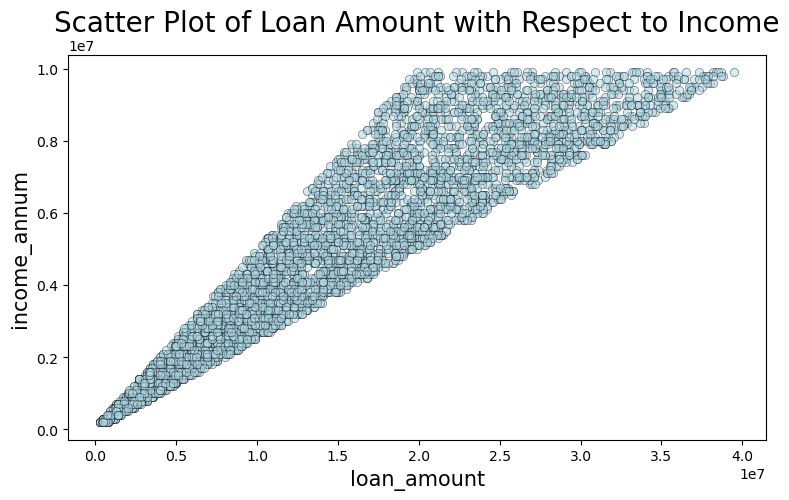

In [85]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='loan_amount',y='income_annum',data=df,color='lightblue',alpha=0.5,edgecolor='black')
plt.title("Scatter Plot of Loan Amount with Respect to Income",fontsize=20)
plt.xlabel('loan_amount',fontsize=15)
plt.ylabel('income_annum',fontsize=15)
plt.show()

- The scatter plot shows a perfect ***positive correlation***, indicating the two plotted variables are identical or ***extremely closely related***.

### 5.2 Scatter Plot of CIBIL Score vs Income Annum

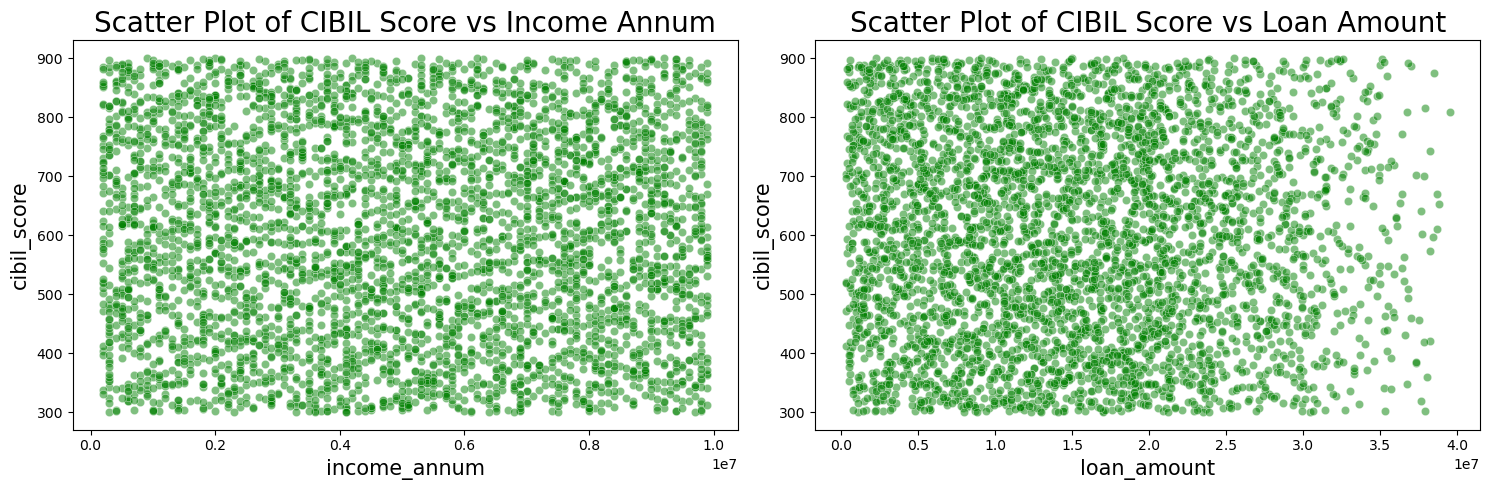

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(x='income_annum', y='cibil_score', data=df, color='green', alpha=0.5)
plt.title("Scatter Plot of CIBIL Score vs Income Annum",fontsize=20)
plt.ylabel('cibil_score',fontsize=15)
plt.xlabel('income_annum',fontsize=15)
plt.subplot(1,2,2)
sns.scatterplot(x='loan_amount', y='cibil_score', data=df, color='green', alpha=0.5)
plt.title("Scatter Plot of CIBIL Score vs Loan Amount",fontsize=20)
plt.ylabel('cibil_score',fontsize=15)
plt.xlabel('loan_amount',fontsize=15)
plt.tight_layout()
plt.show()


- CIBIL score shows no clear correlation with either income or loan amount, indicating a scattered distribution.